In [4]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00


In [5]:
import streamlit as st
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
st.title("Bank NIFTY Price Predictor App")

stock = "^NSEBANK"#"BTC-USD"

from datetime import datetime
end = datetime.now()
start = datetime(end.year-10,end.month,end.day)

stock = st.text_input("Enter the stock here",stock)

bit_coin_data = yf.download(stock, start, end)

model = load_model("Latest_bit_coin_model.keras")
st.subheader("Bank NIFTY Data")
st.write(bit_coin_data)

splitting_len = int(len(bit_coin_data)*0.9)
x_test = pd.DataFrame(bit_coin_data.Close[splitting_len:])

st.subheader('Original Close Price')
figsize = (15,6)
fig = plt.figure(figsize=figsize)
plt.plot(bit_coin_data.Close,'b')
st.pyplot(fig)

st.subheader("Test Close Price")
st.write(x_test)

st.subheader('Test Close Price')
figsize = (15,6)
fig = plt.figure(figsize=figsize)
plt.plot(x_test,'b')
st.pyplot(fig)

# preprocess the data
# preprocessing the data into [0 to 1] range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(x_test[['Close']].values)

x_data = []
y_data = []
for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

predictions = model.predict(x_data)
inv_pre = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_data)


ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_pre.reshape(-1)
 } ,
    index = bit_coin_data.index[splitting_len+100:]
)
st.subheader("Original values vs Predicted values")
st.write(ploting_data)

st.subheader('Original Close Price vs Predicted Close price')
fig = plt.figure(figsize=(15,6))
plt.plot()

plt.plot(pd.concat([bit_coin_data.Close[:splitting_len+100],ploting_data], axis=0))
plt.legend(["Data- not used", "Original Test data", "Predicted Test data"])
st.pyplot(fig)

st.subheader("Future Price values")
# st.write(ploting_data)

last_100 = bit_coin_data[['Close']].tail(100)
last_100 = scaler.fit_transform(last_100['Close'].values.reshape(-1,1)).reshape(1,-1,1)
prev_100 = np.copy(last_100).tolist()

def predict_future(no_of_days,prev_100):
    future_predictions = []
    for i in range(int(no_of_days)):
        print(type(prev_100))
        next_day = model.predict(prev_100).tolist()
        prev_100[0].append(next_day[0])
        prev_100 = [prev_100[0][1:]]
        future_predictions.append(scaler.inverse_transform(next_day))
    return future_predictions

no_of_days = int(st.text_input("Enter the No of days to be predicted from current date : ","10"))
future_results = predict_future(no_of_days,prev_100)
future_results = np.array(future_results).reshape(-1,1)
print(future_results)
fig = plt.figure(figsize=(15, 6))
plt.plot(pd.DataFrame(future_results), marker = 'o')
for i in range(len(future_results)):
    plt.text(i, future_results[i], int(future_results[i][0]))
plt.xlabel('days')
plt.ylabel('Close Price')
plt.xticks(range(no_of_days))
plt.yticks(range(min(list(map(int, future_results))), max(list(map(int, future_results))),100))
plt.title('Closing Price of Google')
st.pyplot(fig)

2024-12-05 12:14:12.227 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 12:14:12.663 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-05 12:14:12.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 12:14:12.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 12:14:12.675 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 12:14:12.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 12:14:12.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 12:14:12.684 Session state does not 

ValueError: File not found: filepath=Latest_bit_coin_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [8]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=317b0ae8f1bbbd329147f67aa82bf38f6361da61c66af40d20455f7178bd0e50
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


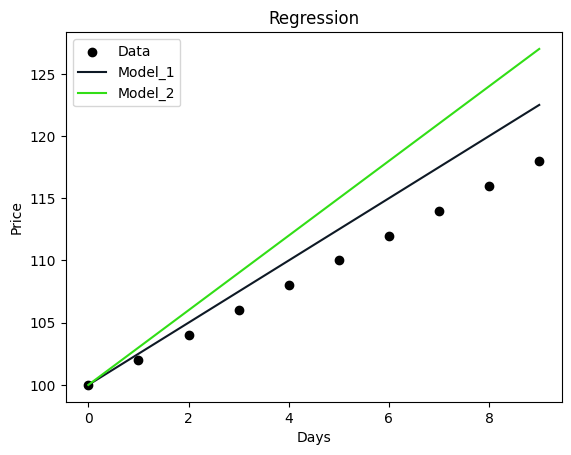

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def create_plot(dates, original_prices, ml_models_outputs):
    plt.scatter(dates, original_prices, color='black', label='Data')
    for model in ml_models_outputs.keys():
        plt.plot(dates, ml_models_outputs[model], color=np.random.rand(3,), label=model)
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Regression')
    plt.legend()
    plt.savefig("Plot.png")
    plt.show()

# Mock data
dates = list(range(10))
prices = [100 + i*2 for i in range(10)]
ml_models_outputs = {
    "Model_1": [100 + i*2.5 for i in range(10)],
    "Model_2": [100 + i*3 for i in range(10)],
}

# Test the function
create_plot(dates, prices, ml_models_outputs)
